In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#file reading
data=pd.read_csv('mydata.txt',names=['exam1','exam2','admitted'])

In [3]:
data.head()

,exam1,exam2,admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
#A breif statistical summmary
data.describe()

,exam1,exam2,admitted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [5]:
print(data['admitted'].value_counts()) # 2 classes 
print('\n----------------------------------------\n')
print(data.dtypes)  # float variables 

0    60
1    58
Name: admitted, dtype: int64

----------------------------------------

exam1       float64
exam2       float64
admitted      int64
dtype: object


Text(0, 0.5, 'exam2')

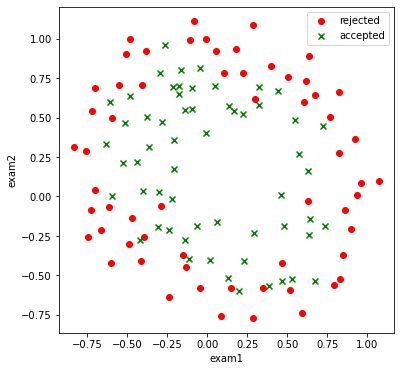

In [6]:
# tracing of the two classes according to exam1 and exam2 
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(data[data['admitted']==0]['exam1'],data[data['admitted']==0]['exam2'],c='r',marker='o',label='rejected')
ax.scatter(data[data['admitted']==1]['exam1'],data[data['admitted']==1]['exam2'],c='g',marker='x',label='accepted')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')


In [7]:
# decomposition the data into X (input) and y(output)
ncol=data.shape[1]
X=data.iloc[:,0:ncol-1]
y=data.iloc[:,ncol-1:ncol]


In [8]:
# combination of exam1 and exam2 to create other features (power 2 and 3)
for i in range(1,4):
    for j in range(0,i):
        X['X'+str(i)+str(j)]=np.multiply(np.power(X['exam1'],i),np.power(X['exam2'],j))
        X['X'+str(j)+str(i)]=np.multiply(np.power(X['exam1'],j),np.power(X['exam2'],i))
        

In [9]:
# isertion the feature of values 1
X.insert(0,'one',1)
X.drop(['exam1','exam2'],axis=1,inplace=True) # renamed exam1 and exam2 with (X10 and X01)

In [10]:
X.head()

,one,X10,X01,X20,X02,X21,X12,X30,X03,X31,X13,X32,X23
0,1,0.051267,0.69956,0.002628,0.489384,0.001839,0.025089,0.000135,0.342354,0.000094,0.017551,0.000066,0.000900
1,1,-0.092742,0.68494,0.008601,0.469143,0.005891,-0.043509,-0.000798,0.321335,-0.000546,-0.029801,-0.000374,0.002764
2,1,-0.213710,0.69225,0.045672,0.479210,0.031616,-0.102412,-0.009761,0.331733,-0.006757,-0.070895,-0.004677,0.015151
3,1,-0.375000,0.50219,0.140625,0.252195,0.070620,-0.094573,-0.052734,0.126650,-0.026483,-0.047494,-0.013299,0.017810
4,1,-0.513250,0.46564,0.263426,0.216821,0.122661,-0.111283,-0.135203,0.100960,-0.062956,-0.051818,-0.029315,0.026596


In [11]:
########################################""

In [12]:
#  lamda and learning rate parametrs
LAMBDA=10
learning_rate=0.8

In [13]:
# definition of the sigmoid classification function
def sigmoid(t):
    return (1/(1+np.exp(-t)))

In [14]:
# cost function with regularization
def costreg(thetav,Xv,yv):
    thetav=np.matrix(thetav)
    Xv=np.matrix(Xv)
    yv=np.matrix(yv)
    if (thetav.shape[0]*thetav.shape[1]==Xv.shape[1]) and (yv.shape[0]*yv.shape[1]==Xv.shape[0]):
        thetav=thetav.reshape((1,Xv.shape[1]))
        yv=yv.reshape((Xv.shape[0],1))
        A=sigmoid(Xv*thetav.T)
        B=1-sigmoid(Xv*thetav.T)
        first=np.multiply(yv,np.log(A))
        seconde=np.multiply(1-yv,np.log(B))
        c=(-1/Xv.shape[0])*((first+seconde).sum())
        reg=(LAMBDA/Xv.shape[0])*(np.sum(np.power(thetav[:,5:thetav.shape[1]],2)))
        return c+reg
    else:
        print('incorrect dimensions !!!')


In [15]:
# gradient descent
def gradd(thetag,Xg,yg):
    thetag=np.matrix(thetag)
    Xg=np.matrix(Xg)
    yg=np.matrix(yg)
    A=2*learning_rate*LAMBDA*(thetag)/Xg.shape[0]
    A[0,0:5]=0
    gr=(learning_rate/Xg.shape[0])*(Xg.T*(sigmoid(Xg*thetag.T)-yg)).T+A
    return gr
 

In [16]:
# first method to determine the optimal thetas
def findtheta(theta,X,y):
    theta=np.ones(X.shape[1])
    mini=costreg(theta,X,y)
    thetaopt=theta.copy()
    j=0
    for i in range(10000):
        theta=theta-gradd(theta,X,y)
        tmp=costreg(theta,X,y)
        if tmp<mini:
            mini=tmp
            thetaopt=theta
            j+=1
    return (thetaopt)

In [17]:
theta=np.ones(X.shape[1])
start_time1=time.time()
theaopt=findtheta(theta,X,y)
end_time1=time.time()
print('\n execution time  is:',end_time1-start_time1)


 execution time  is: 3.617077589035034


In [18]:
# calculer l'accurcy
def predict(thet,X):
    thet=np.matrix(thet)
    X=np.matrix(X)
    probabiliti=sigmoid(X*thet.T)
    return [1 if x>=0.5 else 0 for x in probabiliti]
predictions=predict(theaopt,X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, np.array(y.values))]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy first methode = {0}%'.format(accuracy))

accuracy first methode = 95%


In [19]:
#####################################################################################

In [20]:
#####################################################################################

In [21]:
# Seconde methode with optimize in scipy
import scipy.optimize as opt

In [22]:
start_time2=time.time()
result=opt.fmin_tnc(func=costreg,x0=theta,fprime=gradd,args=(X,y))
end_time2=time.time()
print('\n execution time  is:',end_time2-start_time2)



 execution time  is: 0.021973609924316406


In [23]:
result

(array([ 3.81245887e+00,  1.37608825e+00,  2.31675711e+00, -8.45190998e+00,
        -7.77597929e+00, -2.14454276e-02, -3.96349534e-02, -3.53448100e-03,
        -2.29431058e-02, -3.94132974e-02, -6.13879200e-02, -6.09567445e-03,
        -1.02284282e-02]),
 46,
 1)

In [24]:
thetamin=result[0]
predictions=predict(thetamin,X)

In [25]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, np.array(y))]

In [26]:
accuracy = (sum(map(int, correct)) % len(correct))

In [27]:
print ('accuracy seconde methode = {0}%'.format(accuracy))

accuracy seconde methode = 95%


In [28]:
###############################################################

In [29]:
###############################################################

In [30]:
# plotting thetas equations

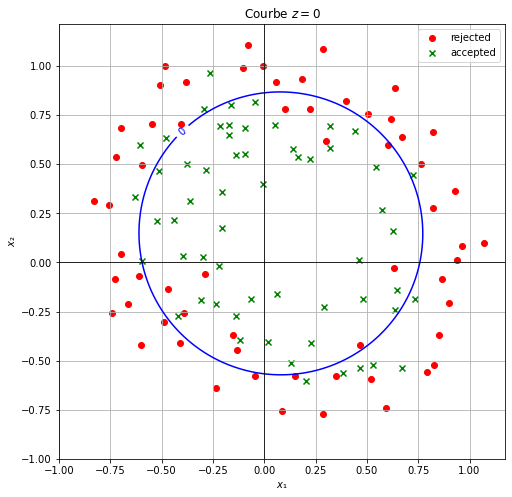

In [31]:
# Define coefficients of X1(exam1) and X2(axam2)
T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12 = list(np.array(theaopt.reshape(13,1)))  # Coefficient de x₁

# Set the range of variables x₁ and x₂
x1 = np.linspace(-1, 1, 400)  # range x₁
x2 = np.linspace(-1, 1, 400)  # range x₂
x1, x2 = np.meshgrid(x1, x2)    # Creating a 2D grid

# Calculate the equation
z = T0 + T1*x1 + T2*x2 + T3*x1**2 + T4*x2**2 + T5*x2*x1**2 + T6*x1*x2**2 + T7*x1**3 + T8*x2**3 + T9*x2*x1**3+ T10*x1*x2**3+ (T11*x1**3)*x2**2 + (T12*x2**3)*x1**2

# Draw the contour line for z = 0
plt.figure(figsize=(8, 8))
contour = plt.contour(x1, x2, z, levels=[0], colors='blue')
plt.scatter(data[data['admitted']==0]['exam1'],data[data['admitted']==0]['exam2'],c='r',marker='o',label='rejected')
plt.scatter(data[data['admitted']==1]['exam1'],data[data['admitted']==1]['exam2'],c='g',marker='x',label='accepted')
plt.clabel(contour, inline=True, fontsize=10)
plt.title(r'Courbe $z = 0$')
plt.xlabel(r'$x₁$')
plt.ylabel(r'$x₂$')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.show()